In [1]:
import numpy as np
from astropy.io import fits

In [2]:
import matplotlib.pyplot as plt

In [5]:
from scipy.linalg import dft

In [114]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'

# Analytical Beam

In [416]:
n_pix = 128

F = np.fft.fftshift(dft(n_pix, scale='sqrtn'))
F_H = np.conj(F.T)

In [420]:
x = np.arange(-10, 10, 20/n_pix)

In [417]:
x = np.linspace(-10, 10, n_pix)
k = np.linspace(-1./(2*np.diff(x)[0]), 1./(2*np.diff(x)[0]), n_pix)

y = np.zeros(n_pix)
y[np.abs(x)<0.5] = 1
y[np.abs(x)<1] = 1

Y = F@y

In [418]:
np.trapz(y)

12.0

In [419]:
Y.real.max()/Y.imag.max()

12.000000000000572

In [216]:
Y_ = (Y.real.max()*np.sinc(2*k) + Y.imag.max()*1j*np.sin(2*2.99*k))

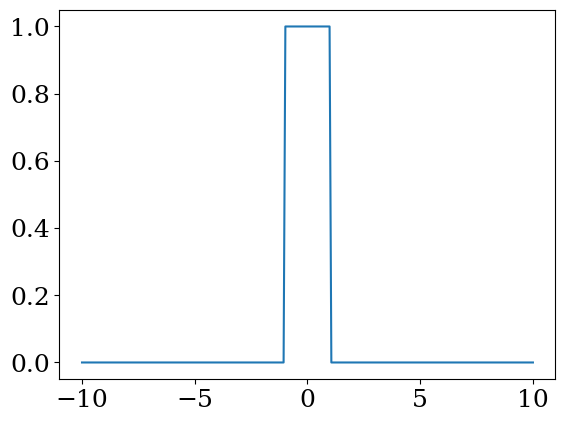

In [217]:
plt.plot(x, y)

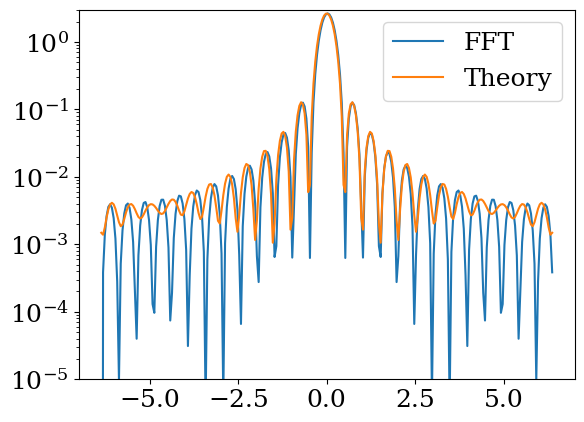

In [218]:
plt.plot(k, np.abs(Y)**2, label='FFT')
plt.plot(k, np.abs(Y_)**2, label='Theory')
plt.semilogy()
plt.ylim(1e-5, 3)
plt.legend()

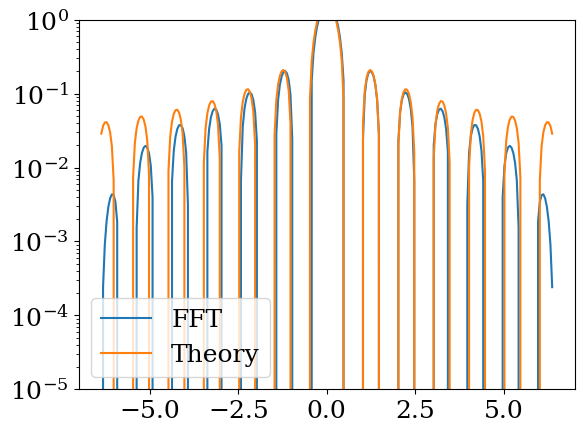

In [219]:
plt.plot(k, Y.real, label='FFT')
plt.plot(k, Y_.real, label='Theory')
plt.semilogy()
plt.ylim(1e-5, 1)
plt.legend()

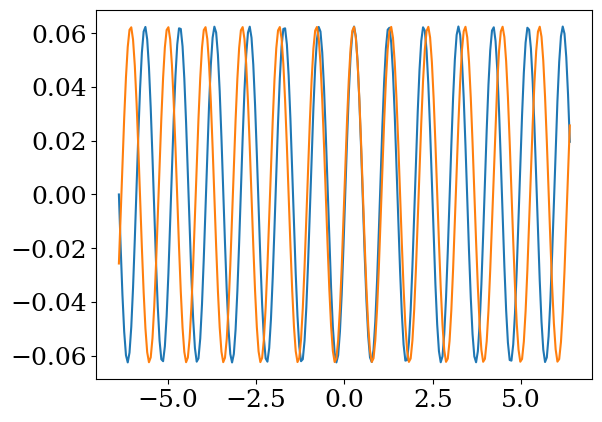

In [220]:
plt.plot(k, Y.imag)
plt.plot(k, Y_.imag)

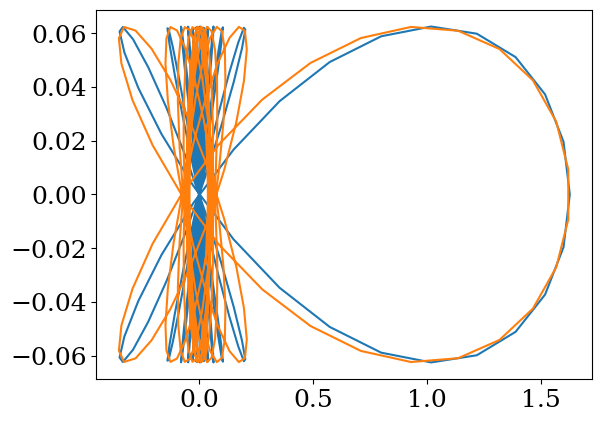

In [221]:
plt.plot(Y.real, Y.imag)
plt.plot(Y_.real, Y_.imag)

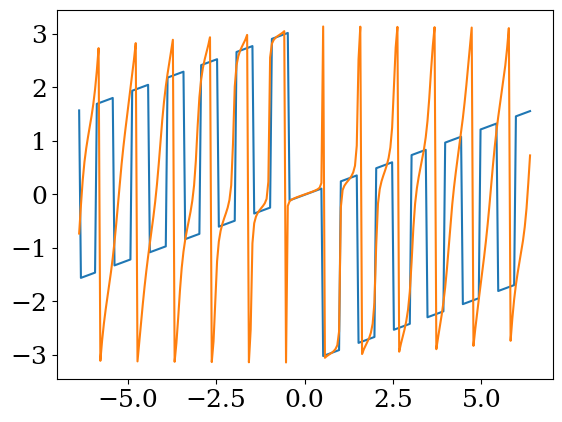

In [222]:
plt.plot(k, np.angle(Y))
plt.plot(k, np.angle(Y_))

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_13007/218597223.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(k, np.arctan(Y.imag/Y.real))


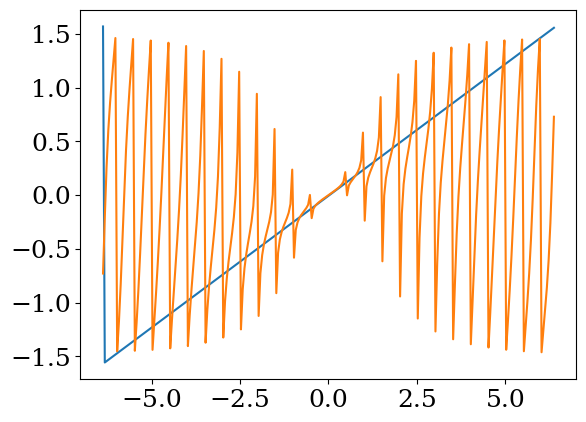

In [223]:
plt.plot(k, np.arctan(Y.imag/Y.real))
plt.plot(k, np.arctan(Y_.imag/Y_.real))

# 2D

In [291]:
from scipy.special import jv

In [273]:
1./np.sqrt(np.pi)

0.5641895835477563

In [396]:
n_pix = 1024
x_max = 20

F = np.fft.fftshift(dft(n_pix, scale='sqrtn'))
F_H = np.conj(F.T)

In [397]:
x = np.linspace(-x_max, x_max, n_pix)
xx, yy = np.meshgrid(x, x)
rr = np.sqrt(xx**2 + yy**2)

k = np.linspace(-1./(2*np.diff(x)[0]), 1./(2*np.diff(x)[0]), n_pix)
kx, ky = np.meshgrid(k, k)
kr = np.sqrt(kx**2 + ky**2)

y = np.zeros((n_pix, n_pix))
y[rr<0.25] = 1

Y = F@(F@y).T

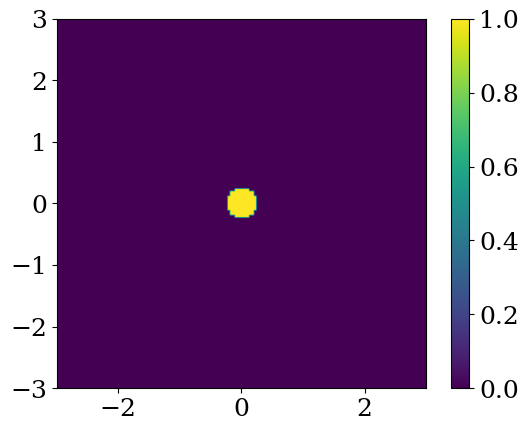

In [398]:
plt.imshow(y, extent=[x[0], x[-1], x[0], x[-1]], origin='lower')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.colorbar()

In [399]:
#Y_ = (Y.real.max()*np.sinc(np.sqrt(kx**2+ky**2)) + Y.imag.max()*1j*np.sin(2.99*np.sqrt(kx**2+ky**2)))

In [400]:
Y_ = Y.real.max()*2*jv(1, (1.5*kr))/(1.5*kr) + Y.imag.max()*1j*np.sin(2.99*kr)

(-20.0, 20.0)

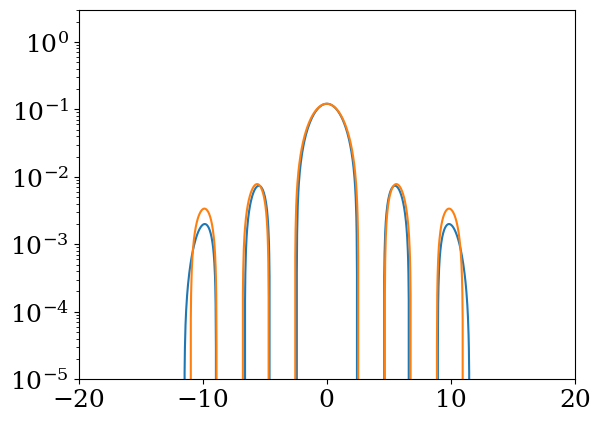

In [401]:
plt.plot(k, Y.real[int(n_pix//2)])
plt.plot(k, Y_.real[int(n_pix//2)])
plt.semilogy()
plt.ylim(1e-5, 3)
plt.xlim(-20, 20)

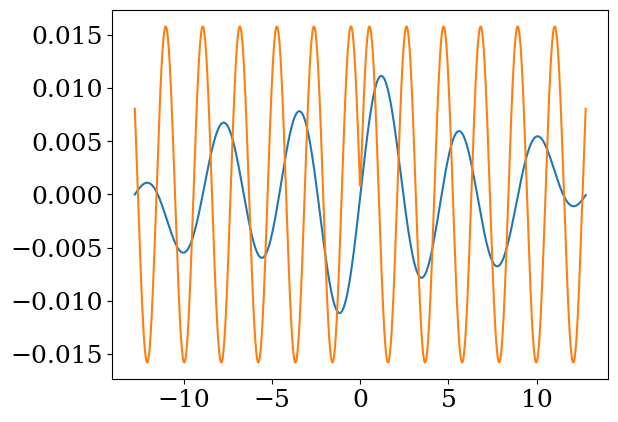

In [402]:
plt.plot(k, Y.imag[int(n_pix//2)])
plt.plot(k, Y_.imag[int(n_pix//2)])

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_13007/955002057.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(Y.real)), extent=[k[0], k[-1], k[0], k[-1]], origin='lower', vmin=-5)


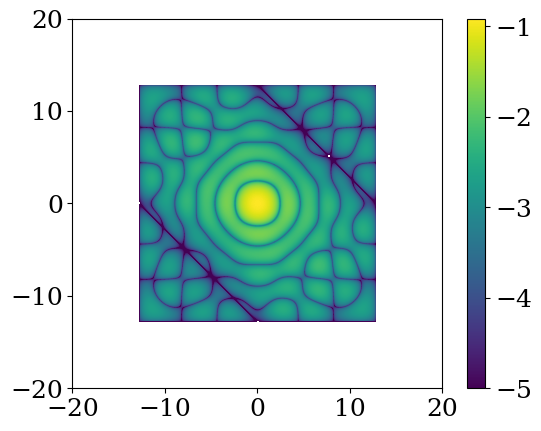

In [403]:
plt.imshow(np.log10(np.abs(Y.real)), extent=[k[0], k[-1], k[0], k[-1]], origin='lower', vmin=-5)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar()

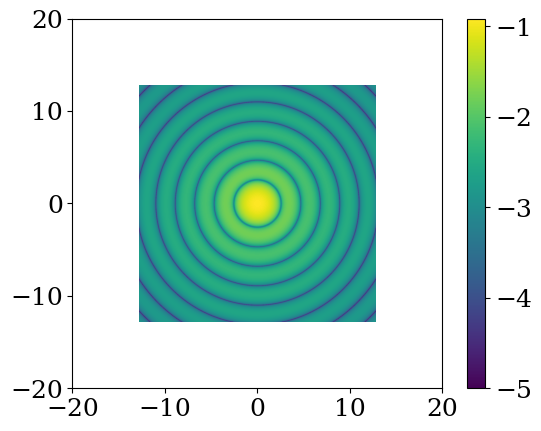

In [404]:
plt.imshow(np.log10(np.abs(Y_.real)), extent=[k[0], k[-1], k[0], k[-1]], origin='lower', vmin=-5)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar()

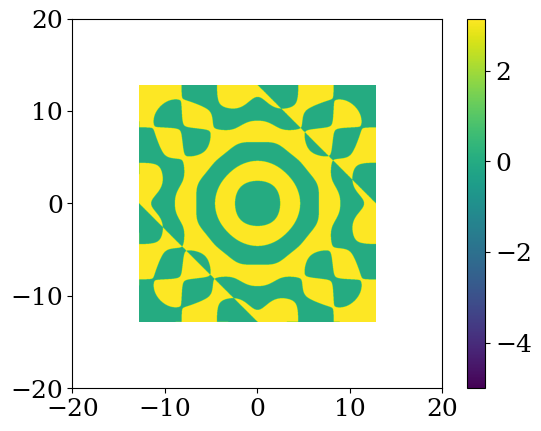

In [405]:
plt.imshow(np.angle(Y.real), extent=[k[0], k[-1], k[0], k[-1]], origin='lower', vmin=-5)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar()

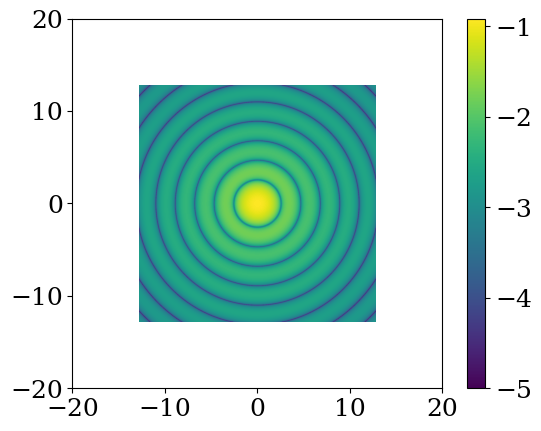

In [406]:
plt.imshow(np.log10(np.abs(Y_.real)), extent=[k[0], k[-1], k[0], k[-1]], origin='lower', vmin=-5)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.colorbar()

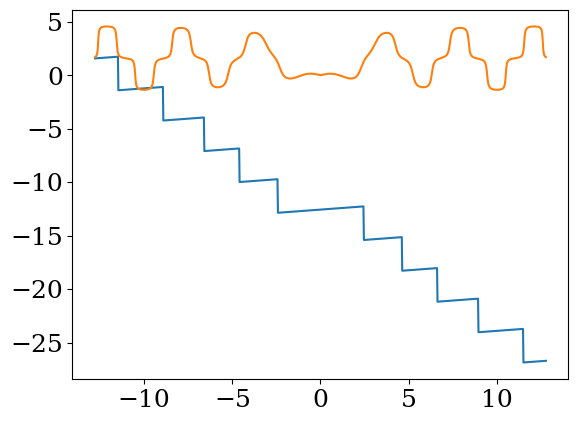

In [407]:
plt.plot(k, np.unwrap(np.angle(Y)[int(n_pix//2)]))
plt.plot(k, np.unwrap(np.angle(Y_)[int(n_pix//2)]))

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_13007/4245907531.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(k, np.unwrap(2*np.arctan(Y.imag/Y.real)[int(n_pix//2)], discont=0.0))


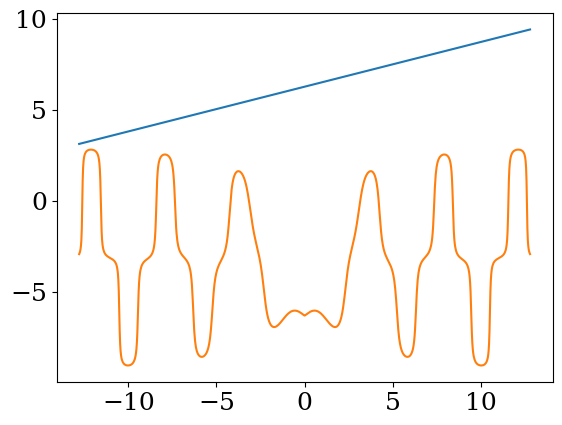

In [408]:
plt.plot(k, np.unwrap(2*np.arctan(Y.imag/Y.real)[int(n_pix//2)], discont=0.0))
plt.plot(k, np.unwrap(2*np.arctan(Y_.imag/Y_.real)[int(n_pix//2)], discont=0.0))

# Eidos MeerKAT Beam Zernike

In [371]:
hdul_r = fits.open('data/primary_beam/primary_beam_mh_1227MHz_10deg_re.fits')
hdul_i = fits.open('data/primary_beam/primary_beam_mh_1227MHz_10deg_im.fits')

In [381]:
n_pix = hdul_r[0].header['NAXIS1']

In [372]:
hdul_r[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    5 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                    2                                                  
NAXIS4  =                    2                                                  
NAXIS5  =                    1                                                  
CTYPE1  = 'py      '                                                            
CRPIX1  =                256.0                                                  
CRVAL1  =                  0.0                                                  
CDELT1  =           0.01953125                                                  
CUNIT1  = 'deg     '        

In [373]:
beam_h = hdul_r[0].data[0,0,0] + 1.j*hdul_i[0].data[0,0,0]

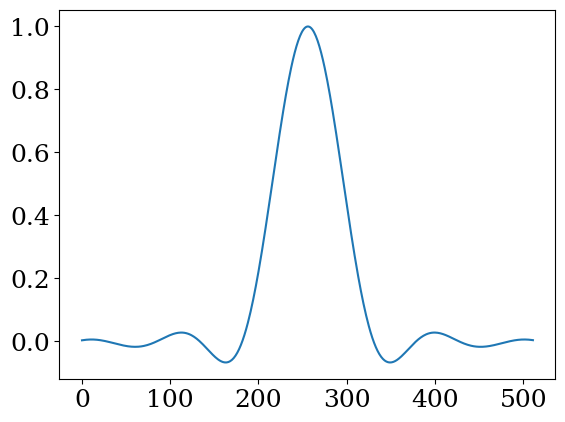

In [383]:
plt.plot(np.real(beam_h[int(n_pix//2)]))

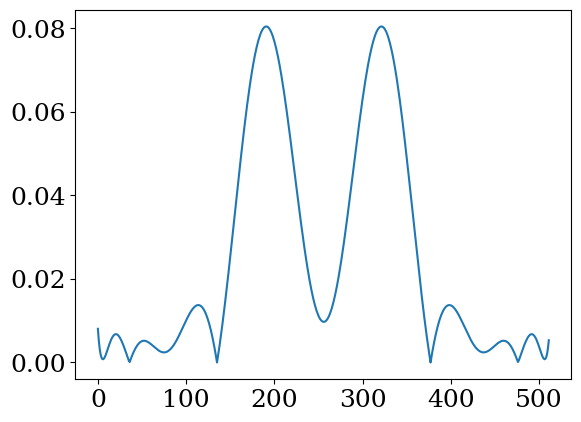

In [384]:
plt.plot(np.abs(np.imag(beam_h[int(n_pix//2)])))

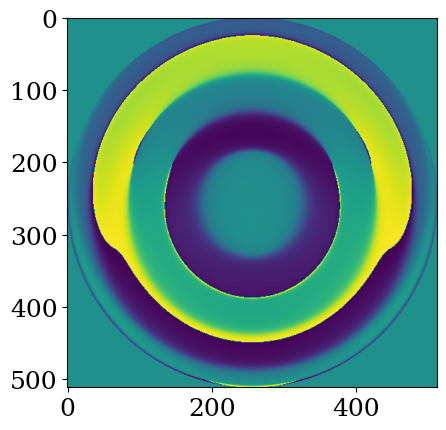

In [374]:
plt.imshow(np.angle(beam_h))

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_13007/670478262.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(beam_h)))


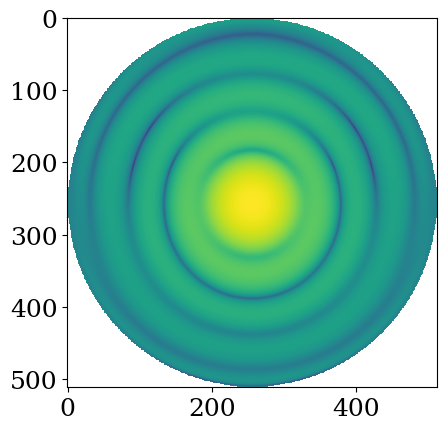

In [375]:
plt.imshow(np.log10(np.abs(beam_h)))

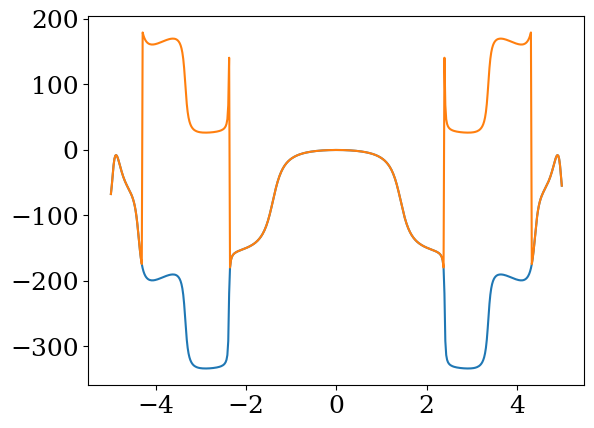

In [378]:
deg = np.linspace(-5, 5, len(beam_h))
plt.plot(deg, np.rad2deg(np.unwrap(np.angle(beam_h[256]))))

plt.plot(deg, np.rad2deg(np.angle(beam_h[256])))
# plt.plot(deg, np.rad2deg(np.unwrap(2*np.arctan(beam_h[256].imag/beam_h[256].real))))
# plt.plot(deg, 1000+200*np.log10(np.abs(beam_h[256])))

(-200.0, 200.0)

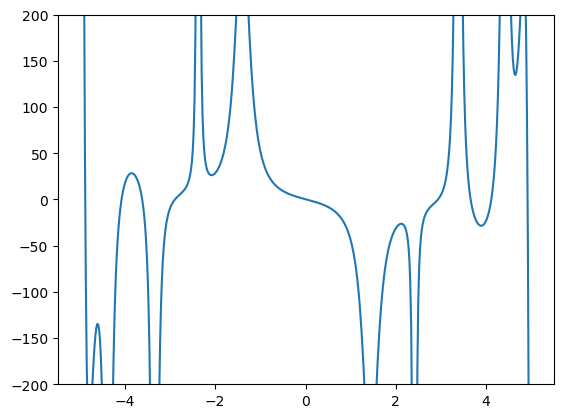

In [42]:
plt.plot(deg[1:], np.diff(np.rad2deg(np.unwrap(np.angle(beam_h[256]))))/np.diff(deg))
plt.ylim(-200, 200)